# Project 3- Spatial Transcriptomics
Deadline: 19.01.2025, 23:59

## Introduction to Seurat
The tool that you will mainly use in this project is Seurat, a tool you are already familiar with in project 1. Seurat includes the functionality to explicitly analyze spatial transcriptomics data. A tutorial and good introduction can be found here

## Download the data
You can download the dataset for this project under the following link: https://icbb-share.s3.eu-central-1.amazonaws.com/single-cell-bioinformatics/scbi_p3.zip

## System setup
Before you start programming, you should set up the system as following:

    devtools::install_github("sqjin/CellChat")

In [4]:
set.seed(42)

In [2]:
library(dplyr)
# library(spatstat.core)
library(Seurat)
library(patchwork)
library(DoubletFinder)
library(SingleR)
# library(enrichR)
library(CellChat)
library(SingleCellExperiment)
library(SeuratWrappers)
library(tidyverse)
# library(monocle3)
library(celldex)
library(hdf5r)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.0 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The follo

***

# Week 1: (9 Points +3 Bonus)
## 1 Spatial Transcriptomics (Bonus: 5P)
10X genomics Visum technology. The given data set is a spatial transcriptomics data set of a mouse brain. It has been aligned and prepared using the Space Ranger software.

### 1.1 Properties of the Slides (1P)
Give the size of the point, the distance between points, and the number of points for this technology.

In [5]:
#define directory with scRNAseq data
setwd("~/Downloads/project_3_dataset/")

# Define file paths for Section 1 and Section 2
section1_path <- "Section_1"

list.files(section1_path)

# Load spatial transcriptomics data
section1_data <- Load10X_Spatial(data.dir = section1_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

print(section1_data)


[1] "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5"
[2] "spatial"

An object of class Seurat 
32285 features across 3355 samples within 1 assay 
Active assay: Spatial (32285 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: slice1


### 1.2 Resolution of the spatial transcriptomics technology (1P)
Compare the technology’s resolution with the size of an average eukaryotic cell and explain what this means when dealing with the data.

In [2]:
average_cell_size <- 10
resolution_comment <- "The resolution of this technology is approximately 10 times larger than the size of an average eukaryotic cell. This means that each spot represents gene expression averaged over multiple cells."
cat(resolution_comment, "\n")

The resolution of this technology is approximately 10 times larger than the size of an average eukaryotic cell. This means that each spot represents gene expression averaged over multiple cells. 


### 1.3 Output of Space Ranger (1P)
Have a first look at the given data. Provide the image taken of the sample, the coordinates of the spots, and one gene-expression matrix.

In [11]:
# Extract gene expression data
gene_expression_section1 <- GetAssayData(section1_data, assay = "Spatial", slot = "counts")

print(gene_expression_section1)

# Display metadata for Section 1
metadata_section1 <- section1_data@meta.data
head(metadata_section1)

32285 x 3355 sparse Matrix of class "dgCMatrix"


  [[ suppressing 32 column names 'AAACAAGTATCTCCCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1' ... ]]

  [[ suppressing 32 column names 'AAACAAGTATCTCCCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1' ... ]]



                                                                                          
Xkr4           .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Gm1992         .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Gm19938        .  1  .  .  .  .  .  .  .  .  .  .  1  .  .  .  .  .  .   .  .   .  .  .  .
Gm37381        .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Rp1            .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Sox17          .  .  .  .  .  .  .  1  .  .  .  .  .  .  .  .  .  .  1   .  .   .  .  .  .
Gm37587        .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Gm37323        .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Mrpl15         .  1  1  .  1  .  .  1  2  .  .  1  2  .  3  .  2  1  3   3  .   3  1  .  .
Lypla1         .  2  .  1  .  .  .  .  .  2  3  1  2  1  3  1  .  .  1   1  .   2  1  .  .

  [[ suppressing 32 column names 'AAACAAGTATCTCCCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1' ... ]]



                                                                                           
Hprt             .   4   5   1   4   .   3   2   3   5   2  .   5   5   16   9    1   3   2
Gm28730          .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
C430049B03Rik    .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Plac1            .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Fam122b          .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Fam122c          .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Mospd1           .   .   .   .   .   .   2   .   1   .   .  1   .   .    .   1    1   .   .
Etd              .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Gm14597          .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Rtl8c            .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .  

,orig.ident,nCount_Spatial,nFeature_Spatial
,<chr>,<dbl>,<int>
AAACAAGTATCTCCCA-1,SeuratProject,9195,3089
AAACACCAATAACTGC-1,SeuratProject,33655,6468
AAACAGAGCGACTCCT-1,SeuratProject,19619,5245
AAACAGCTTTCAGAAG-1,SeuratProject,13420,4107
AAACAGGGTCTATATT-1,SeuratProject,12010,3618
AAACATTTCCCGGATT-1,SeuratProject,5642,2496


## 2 Spatial transcriptomics data in Seurat (3P)
Refer to the tutorial: https://satijalab.org/seurat/articles/spatial_vignette.html

### 2.1 Loading the data
Load the data using the Load10X_Spatial function, which requires both the H5 file and a folder with the image data.

In [27]:
#define directory with scRNAseq data
setwd("~/Downloads/project_3_dataset/")

# Define file paths for Section 1 and Section 2
section1_path <- "Section_1"

list.files(section1_path)

# Load spatial transcriptomics data
section1_data <- Load10X_Spatial(data.dir = section1_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

print(section1_data)

[1] "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5"
[2] "spatial"

An object of class Seurat 
32285 features across 3355 samples within 1 assay 
Active assay: Spatial (32285 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: slice1


### 2.2 Inspecting the Seurat-object
Inspect the Seurat object and identify which data is stored in it. Specify where the gene expression data and the tissue image are stored and how to access them.

### 2.3 Visualization of a feature
Visualize features using scRNA-seq data or directly on the tissue slide. Choose two random genes and show their gene expression in the tissue.

In [17]:
rownames(section1_data)

[1] "Xkr4"             "Gm1992"           "Gm19938"         
    [4] "Gm37381"          "Rp1"              "Sox17"           
    [7] "Gm37587"          "Gm37323"          "Mrpl15"          
   [10] "Lypla1"           "Tcea1"            "Rgs20"           
   [13] "Gm16041"          "Atp6v1h"          "Oprk1"           
   [16] "Npbwr1"           "Rb1cc1"           "4732440D04Rik"   
   [19] "Alkal1"           "St18"             "Pcmtd1"          
   [22] "Gm26901"          "Gm30414"          "Sntg1"           
   [25] "Rrs1"             "Adhfe1"           "2610203C22Rik"   
   [28] "Vxn"              "Gm29520"          "Mybl1"           
   [31] "Vcpip1"           "1700034P13Rik"    "Sgk3"            
   [34] "Mcmdc2"           "Snhg6"            "Tcf24"           
   [37] "Ppp1r42"          "Gm15818"          "Cops5"           
   [40] "Cspp1"            "Arfgef1"          "Cpa6"            
   [43] "Prex2"            "A830018L16Rik"    "Gm17644"         
   [46] "Gm29663"          "Sulf1"            "Slco5a1"         
   [49] "Gm29283"          "Prdm14"           "Ncoa2"           
   [52] "Gm29570"          "Tram1"            "Lactb2"          
   [55] "Xkr9"             "Eya1"             "Gm9947"          
   [58] "Msc"              "Trpa1"            "Kcnb2"           
   [61] "Terf1"            "Sbspon"           "4930444P10Rik"   
   [64] "Rpl7"             "Rdh10"            "Gm28095"         
   [67] "Stau2"            "Gm7568"           "Ube2w"           
   [70] "Eloc"             "D030040B21Rik"    "Tmem70"          
   [73] "Ly96"             "Gm28376"          "Jph1"            
   [76] "Gm28783"          "Gdap1"            "Gm28784"         
   [79] "Pi15"             "Gm28154"          "Gm16070"         
   [82] "Crispld1"         "Gm28153"          "Gm28756"         
   [85] "Crisp4"           "Defb18"           "Defb41"          
   [88] "Gm15825"          "Tfap2d"           "Tfap2b"          
   [91] "Gm28340"          "Pkhd1"            "4930486I03Rik"   
   [94] "Gm28653"          "Il17a"            "Il17f"           
   [97] "Mcm3"             "Gm28065"          "6720483E21Rik"   
  [100] "Paqr8"            "Efhc1"            "Tram2"           
  [103] "Gm28287"          "Tmem14a"          "Gsta3"           
  [106] "Gm28836"          "Khdc1a"           "Khdc1c"          
  [109] "Khdc1b"           "Kcnq5"            "Rims1"           
  [112] "Gm29506"          "4933415F23Rik"    "Gm27028"         
  [115] "Gm29107"          "Ogfrl1"           "Gm28822"         
  [118] "B3gat2"           "Smap1"            "Sdhaf4"          
  [121] "Fam135a"          "Col9a1"           "Col19a1"         
  [124] "Lmbrd1"           "Gm28237"          "Gm29414"         
  [127] "Adgrb3"           "4931408C20Rik"    "Gm5524"          
  [130] "Gm597"            "Gm9898"           "Phf3"            
  [133] "Ptp4a1"           "Ptp4a1.1"         "Gm5698"          
  [136] "4931428L18Rik"    "Gm28644"          "Gm29128"         
  [139] "Lgsn"             "Pih1d3"           "Khdrbs2"         
  [142] "Gm5415"           "Gm37724"          "Gm37591"         
  [145] "Prim2"            "Rab23"            "Bag2"            
  [148] "Zfp451"           "Bend6"            "Dst"             
  [151] "Gm26788"          "Gm37958"          "Gm37233"         
  [154] "Ccdc115"          "Gm28306"          "Imp4"            
  [157] "Ptpn18"           "Gm28417"          "4930568A12Rik"   
  [160] "Prss39"           "Cfc1"             "Prss40"          
  [163] "1700101I19Rik"    "Amer3"            "Arhgef4"         
  [166] "Arhgef4.1"        "Gm38336"          "Fam168b"         
  [169] "Plekhb2"          "Gm37068"          "Gm28415"         
  [172] "1110002O04Rik"    "Gm37146"          "Gm33222"         
  [175] "4930535G08Rik"    "Hs6st1"           "Gm37335"         
  [178] "Gm33280"          "Uggt1"            "Neurl3"          
  [181] "Arid5a"           "4930403P22Rik"    "Kansl3"          
  [184] "Fer1l5"           "Lman2l"    

In [19]:
DefaultAssay(section1_data) <- "Spatial"

In [21]:
slotNames(section1_data@assays$Spatial)

[1] "layers"     "cells"      "features"   "default"    "assay.orig"
[6] "meta.data"  "misc"       "key"

We should see slots like data, counts, or scale.data. If the data slot is missing, we need to Normalize the data to populate it 

In [22]:
section1_data <- NormalizeData(section1_data, assay = "Spatial")

Normalizing layer: counts



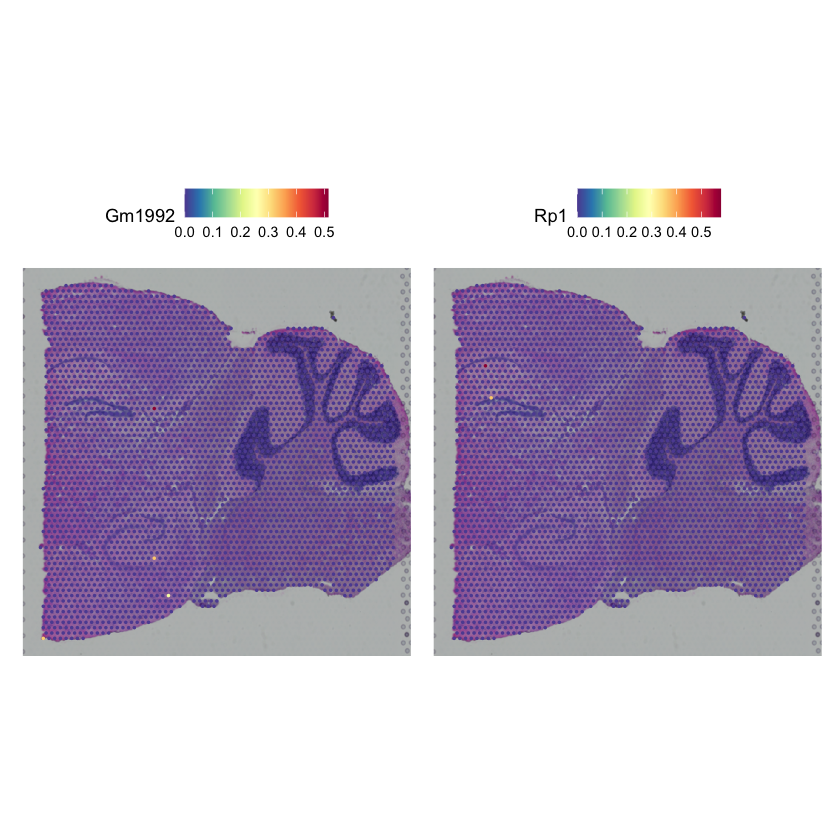

In [25]:
# Visualize the expression of random genes for Section 1
SpatialFeaturePlot(section1_data, features = c("Gm1992", "Rp1"))

## 3 Data preprocessing (4P) 
### 3.1 Filtering
Filter the data for preprocessing. Choose reasonable cut-off values and justify them using suitable plots. Ensure the cut-off values are not set too low. Compare these thresholds with those used in the scRNA-seq data from the first project and explain the differences considering how spatial transcriptomics data are produced.

Warning message:
"Default search for "data" layer in "Spatial" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"The following requested variables were not found: percent.mt"


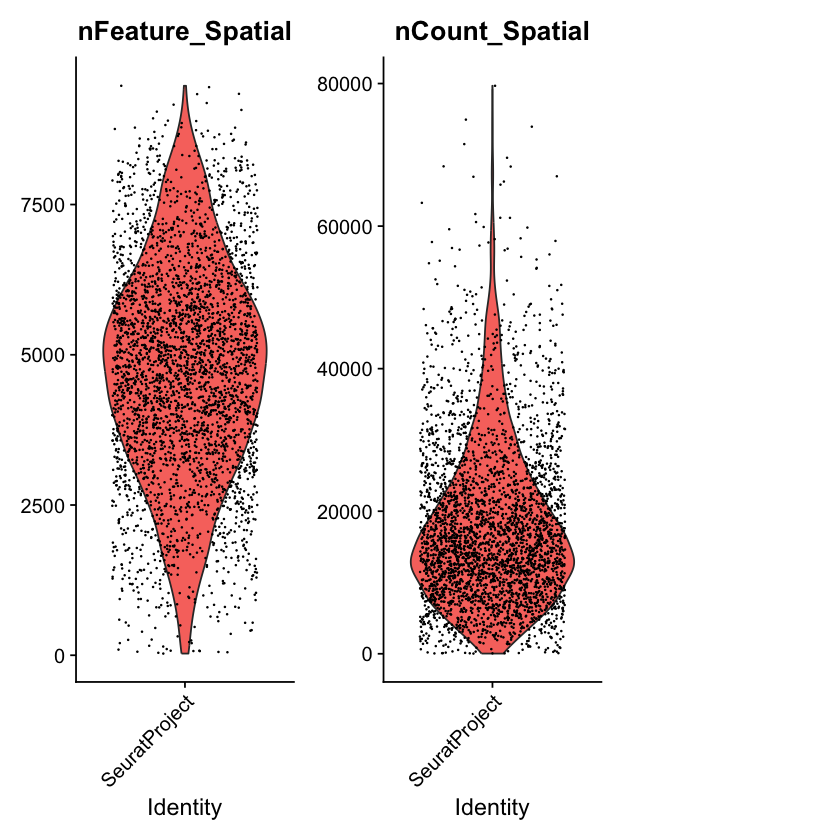

In [6]:
VlnPlot(section1_data, features = c("nFeature_Spatial", "nCount_Spatial", "percent.mt"), ncol = 3)

In scRNA-seq, thresholds (200–2500) are used to filter individual cells, where outliers might represent dying cells or doublets.
In spatial transcriptomics, each spot aggregates gene expression from multiple cells. Therefore:
- Lower thresholds ensure tissue coverage while excluding background.
- Higher thresholds avoid over-filtering as more cells might contribute to a single spot.

In [8]:
# section1_data <- subset(section1_data, subset = nFeature_Spatial > 2000 & nFeature_Spatial < 7500)
section1_data_Filtered <- subset(section1_data, 
                                 subset = nFeature_Spatial > 2500 & nFeature_Spatial < 7500 & 
                                 nCount_Spatial < 60000)


Warning message:
"Not validating Centroids objects"
Warning message:
"Not validating Centroids objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating Seurat objects"


Warning message:
"Default search for "data" layer in "Spatial" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"The following requested variables were not found: percent.mt"


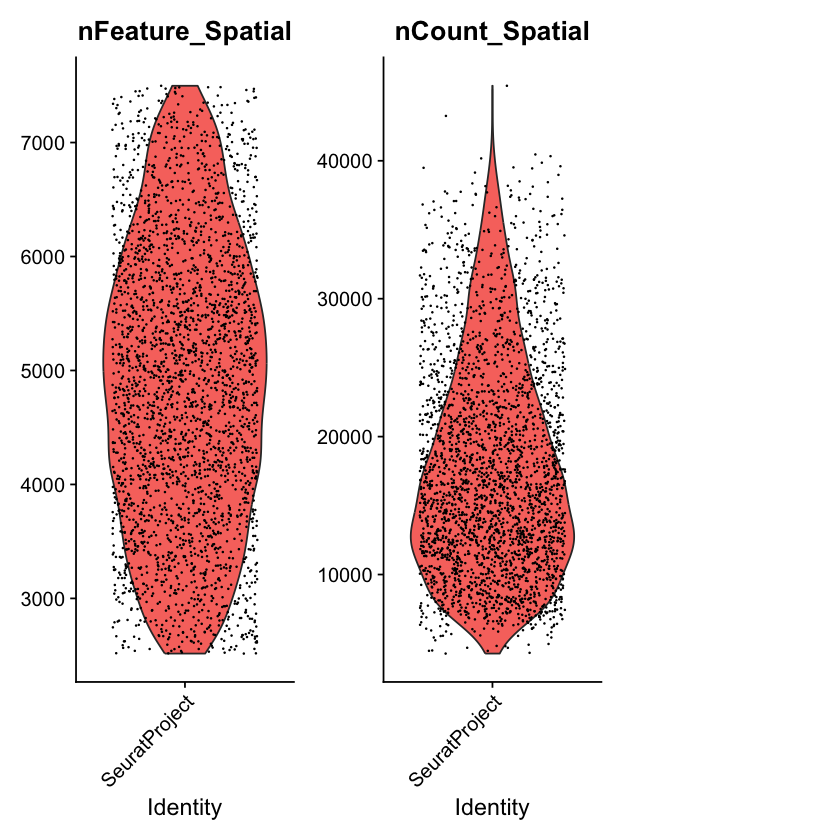

In [10]:
# Visualize gene count and mitochondrial content distributions (Section 1)
VlnPlot(section1_data_Filtered, features = c("nFeature_Spatial", "nCount_Spatial", "percent.mt"), ncol = 3)

### 3.2 Apply SCTransform
Use SCTransform for further preprocessing. Indicate which preprocessing steps from Project 1 are replaced by
this function. If issues arise, replace them with the corresponding steps from Project 1.

In [11]:
# Apply SCTransform for normalization and variance stabilization
section1_data_Filtered <- SCTransform(section1_data_Filtered, assay = "Spatial", verbose = FALSE)

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


